In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
from scipy.signal import resample, iirfilter, lfilter

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 120

In [24]:
gcs_attitude = pd.read_csv('../../build/gcs_attitude.csv')
gcs_imu = pd.read_csv('../../build/gcs_highres_imu.csv')
gcs_local_position = pd.read_csv('../../build/gcs_local_position.csv')
gcs_imu = pd.read_csv('../../build/gcs_highres_imu.csv')
gcs_optical_flow = pd.read_csv('../../build/gcs_optical_flow.csv')
gcs_px4flow = pd.read_csv('../../build/gcs_px4flow.csv')

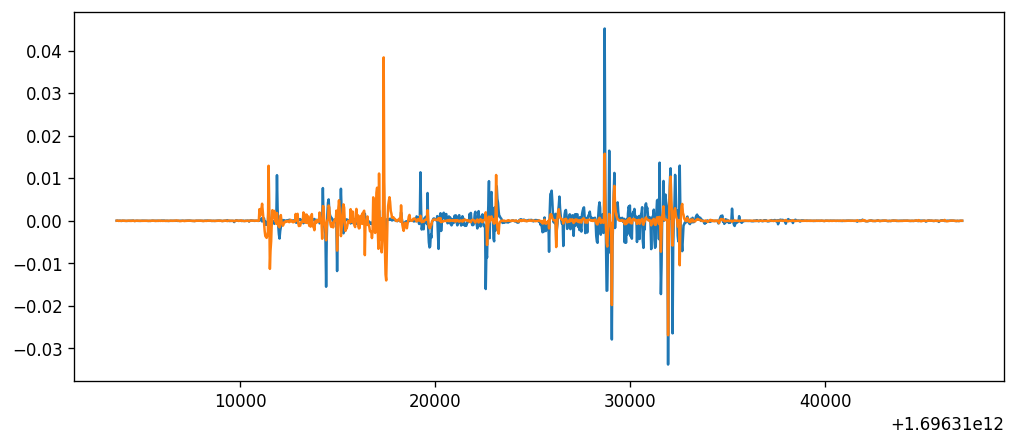

In [25]:
flow_ts = gcs_optical_flow['ts']
flow_vx = gcs_optical_flow['integrated_x']
flow_vy = gcs_optical_flow['integrated_y']

time_delay = 50
flow_ts = flow_ts[time_delay:].to_numpy()
flow_vx = flow_vx[time_delay:]
flow_vy = flow_vy[time_delay:]

flow_dt = (flow_ts[1] - flow_ts[0]) * 1e-3
flow_x = np.cumsum(flow_vx) * flow_dt
flow_y = np.cumsum(flow_vy) * flow_dt
x = np.cumsum(flow_x) * flow_dt
y = np.cumsum(flow_y) * flow_dt
dt = 0.033
plt.plot(flow_ts, flow_vx)
plt.plot(flow_ts, flow_vy)
plt.savefig('optical_flow_xy.png')

In [26]:
px4_ts = gcs_px4flow['ts'][:]
px4flow_x = gcs_px4flow['integrated_x'][:]
px4flow_y = gcs_px4flow['integrated_y'][:]
px4_x = np.cumsum(gcs_px4flow['integrated_x'][:]) * dt
px4_y = np.cumsum(gcs_px4flow['integrated_y'][:]) * dt

px4flow_xgyro = gcs_px4flow['xgyro'][:]
px4flow_ygyro = gcs_px4flow['ygyro'][:]

px4flow_x = resample(px4flow_x, len(flow_x))
px4flow_y = resample(px4flow_y, len(flow_y))


px4flow_vx = np.diff(px4flow_x) / dt
px4flow_vy = np.diff(px4flow_y) / dt

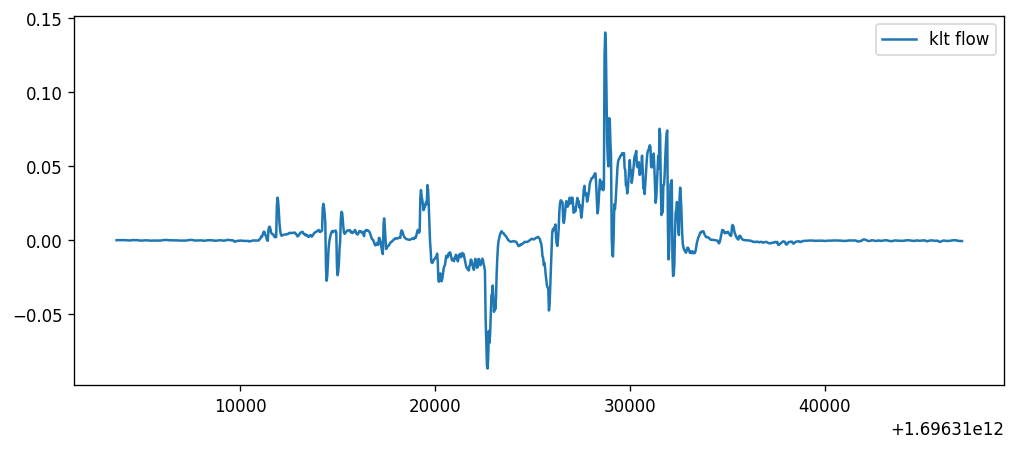

In [29]:
# plt.plot(flow_ts, px4flow_x, label="px4flow")
plt.plot(flow_ts, flow_x*60, label="klt flow")
plt.legend()
plt.savefig('optical_flow_x.png')

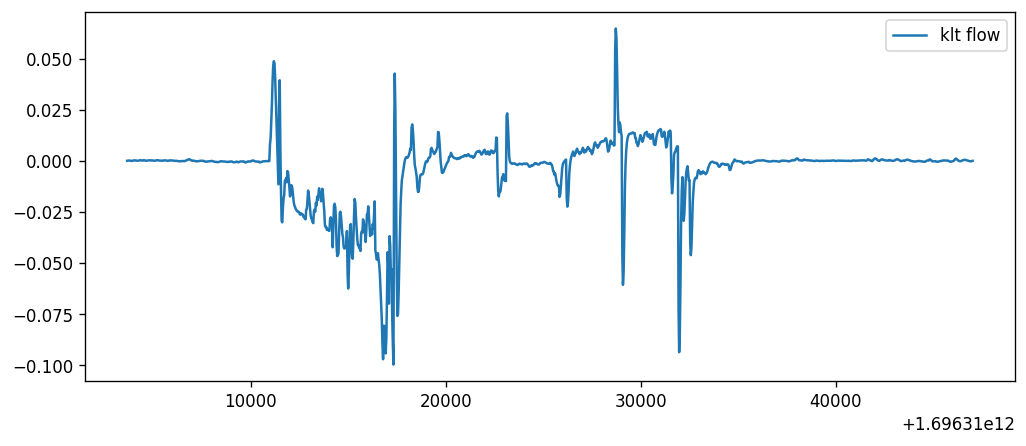

In [30]:
# plt.plot(flow_ts, px4flow_y, label="px4flow")
plt.plot(flow_ts, flow_y*90, label="klt flow")
plt.legend()
plt.savefig('optical_flow_y.png')

In [11]:
pos_ts = gcs_attitude['ts']
vx = gcs_local_position['vx']
vy = gcs_local_position['vy']

pos_dt = pos_ts[1] - pos_ts[0]
vx = resample(vx, len(flow_ts))
vy = resample(vy, len(flow_ts))

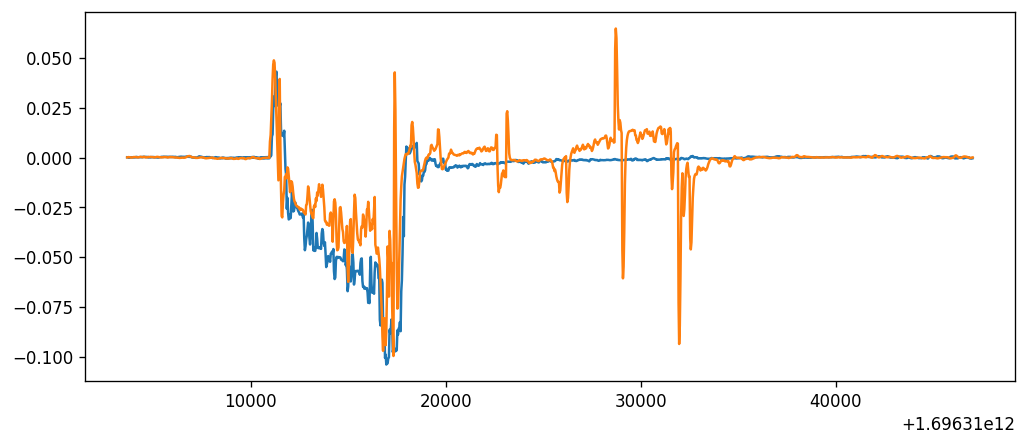

In [12]:
# plt.plot(flow_ts, vx)
# plt.plot(flow_ts, px4flow_x)
plt.plot(flow_ts, px4flow_y)
# plt.plot(flow_ts, flow_x*90)
plt.plot(flow_ts, flow_y*90)
